In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:
df = pd.read_csv("Unemployment in India.csv")

# View first rows
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
df['Date'] = df['Date'].astype(str).str.strip()


In [11]:
df['Date'] = pd.to_datetime(
    df['Date'],
    format='%d-%m-%Y',
    errors='coerce'
)


In [12]:
df = df.dropna(subset=['Date'])


In [13]:
print(df['Date'].head())
print(df['Date'].dtype)


0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [14]:
df = pd.read_csv("Unemployment in India.csv")

df.columns = df.columns.str.strip()

df['Date'] = df['Date'].astype(str).str.strip()
df['Date'] = pd.to_datetime(
    df['Date'],
    format='%d-%m-%Y',
    errors='coerce'
)
df = df.dropna(subset=['Date'])

df['Estimated Unemployment Rate (%)'] = pd.to_numeric(
    df['Estimated Unemployment Rate (%)'],
    errors='coerce'
)
df = df.dropna(subset=['Estimated Unemployment Rate (%)'])

df = df.sort_values('Date')


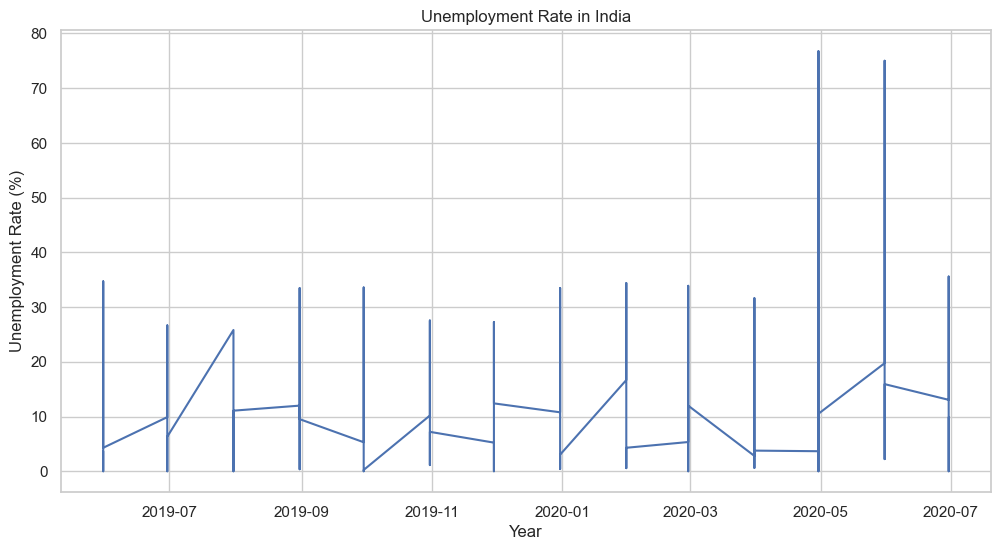

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.title("Unemployment Rate in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [16]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


# Check missing values
df.isnull().sum()

# Drop missing values
df.dropna(inplace=True)

# Sort by date
df = df.sort_values('Date')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


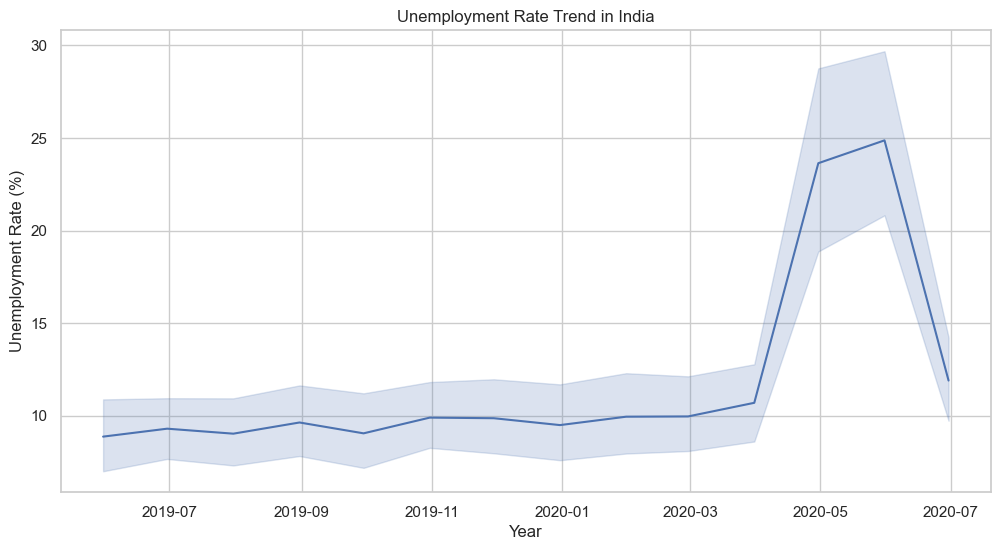

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Trend in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


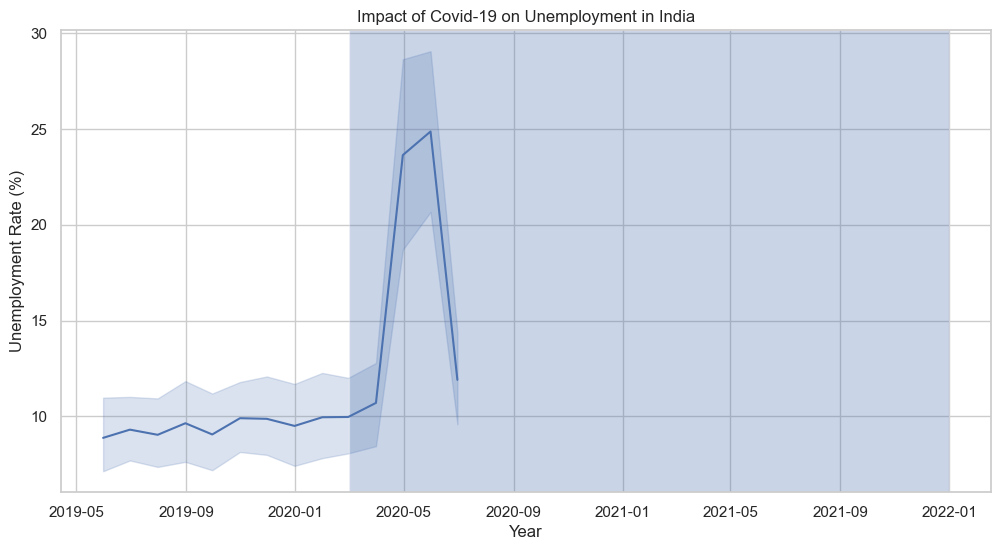

In [18]:
covid_start = "2020-03-01"
covid_end = "2021-12-31"

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.axvspan(pd.to_datetime(covid_start),
            pd.to_datetime(covid_end),
            alpha=0.3)
plt.title("Impact of Covid-19 on Unemployment in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


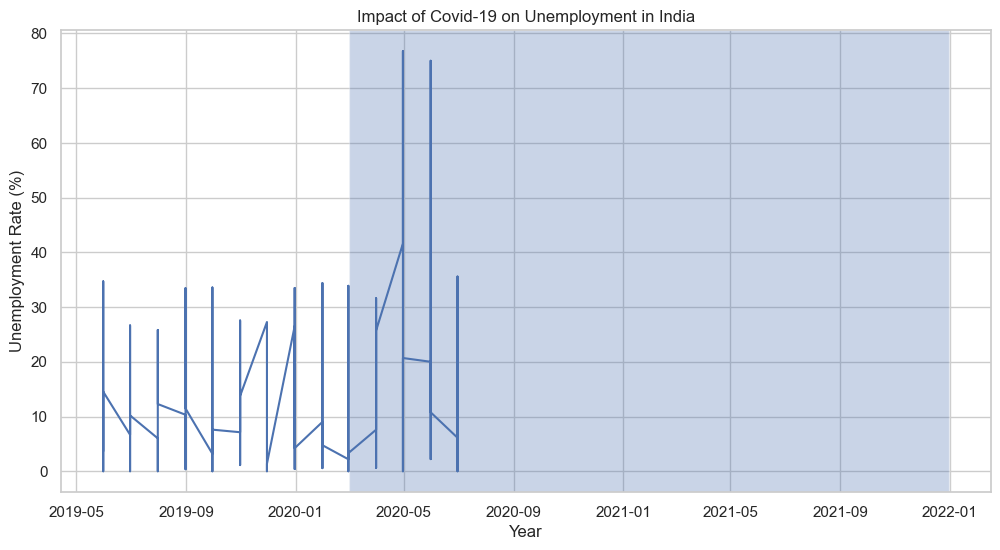

In [19]:
plt.figure(figsize=(12,6))

plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])

plt.axvspan(
    pd.to_datetime("2020-03-01"),
    pd.to_datetime("2021-12-31"),
    alpha=0.3
)

plt.title("Impact of Covid-19 on Unemployment in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [20]:
df['Estimated Unemployment Rate (%)'] = pd.to_numeric(
    df['Estimated Unemployment Rate (%)'],
    errors='coerce'
)

df = df.dropna(subset=['Estimated Unemployment Rate (%)'])


In [21]:
df = df.sort_values('Date')


In [22]:
print(df.dtypes)


Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object


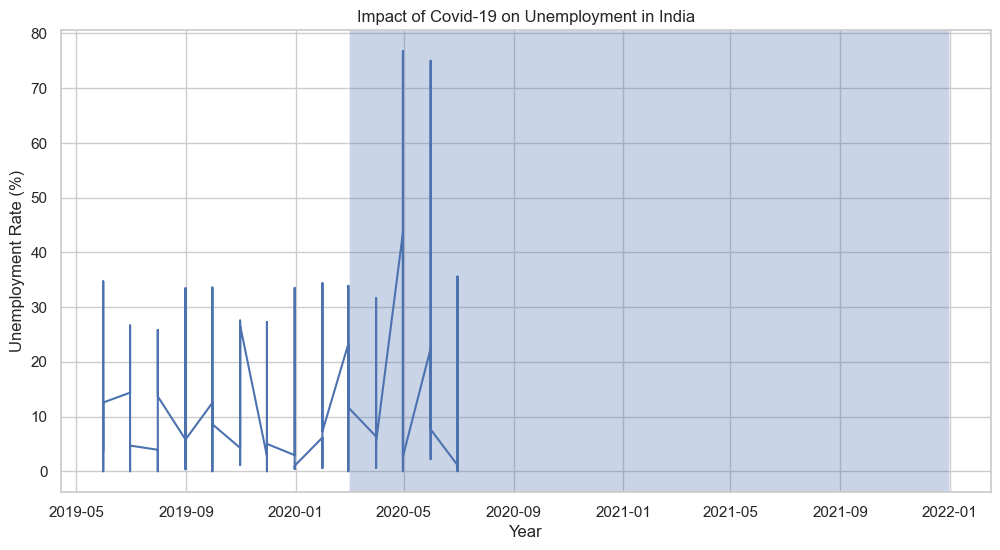

In [23]:
plt.figure(figsize=(12,6))

plt.plot(
    df['Date'],
    df['Estimated Unemployment Rate (%)']
)

plt.axvspan(
    pd.to_datetime("2020-03-01"),
    pd.to_datetime("2021-12-31"),
    alpha=0.3
)

plt.title("Impact of Covid-19 on Unemployment in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


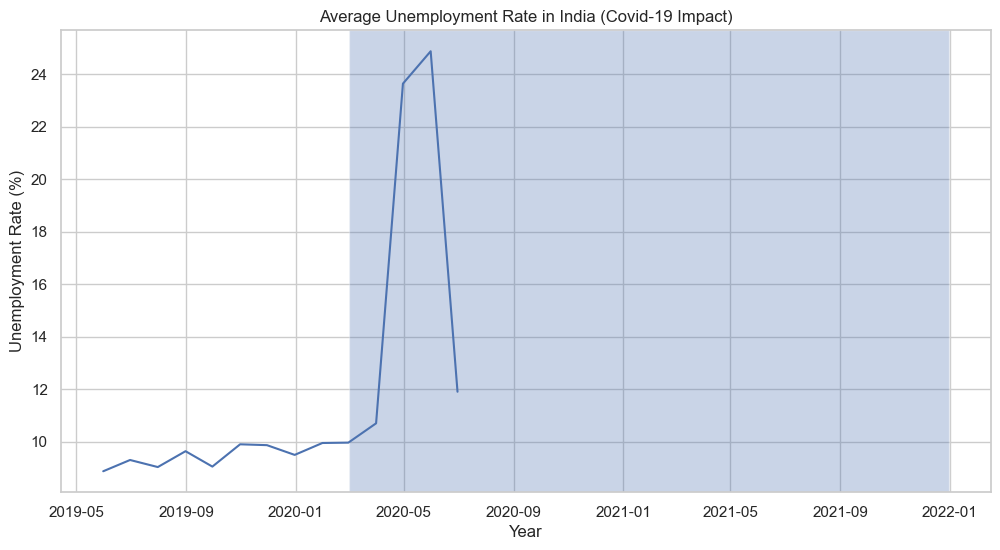

In [24]:
national_avg = (
    df.groupby('Date')['Estimated Unemployment Rate (%)']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(
    national_avg['Date'],
    national_avg['Estimated Unemployment Rate (%)']
)

plt.axvspan(
    pd.to_datetime("2020-03-01"),
    pd.to_datetime("2021-12-31"),
    alpha=0.3
)

plt.title("Average Unemployment Rate in India (Covid-19 Impact)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


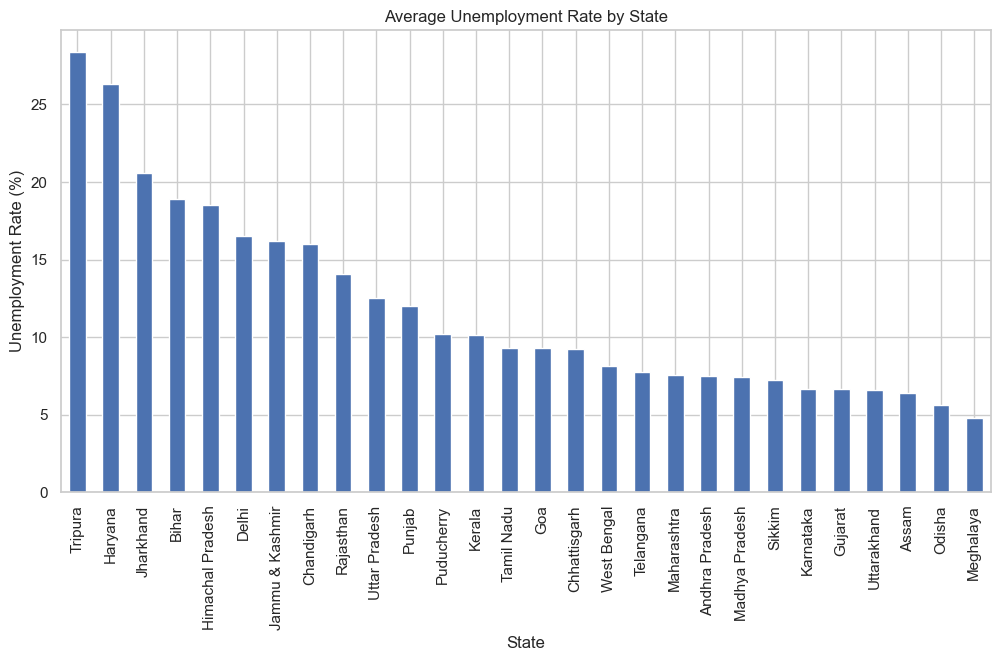

In [25]:
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_avg.plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.xlabel("State")
plt.ylabel("Unemployment Rate (%)")
plt.show()


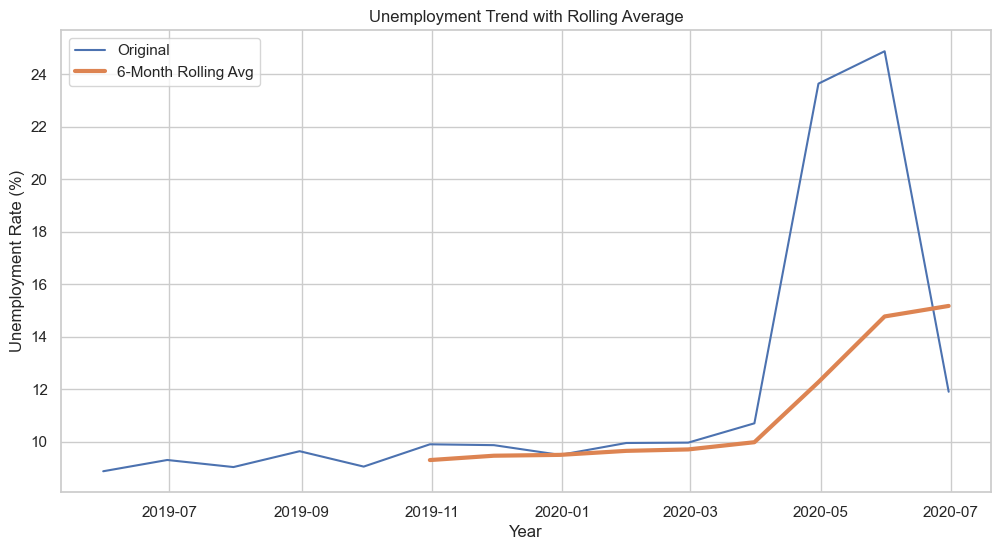

In [27]:
national_avg = (
    df.groupby('Date')['Estimated Unemployment Rate (%)']
    .mean()
    .reset_index()
)

national_avg['rolling_avg'] = (
    national_avg['Estimated Unemployment Rate (%)']
    .rolling(window=6)
    .mean()
)

plt.figure(figsize=(12,6))
plt.plot(national_avg['Date'], national_avg['Estimated Unemployment Rate (%)'], label='Original')
plt.plot(national_avg['Date'], national_avg['rolling_avg'], linewidth=3, label='6-Month Rolling Avg')
plt.title("Unemployment Trend with Rolling Average")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


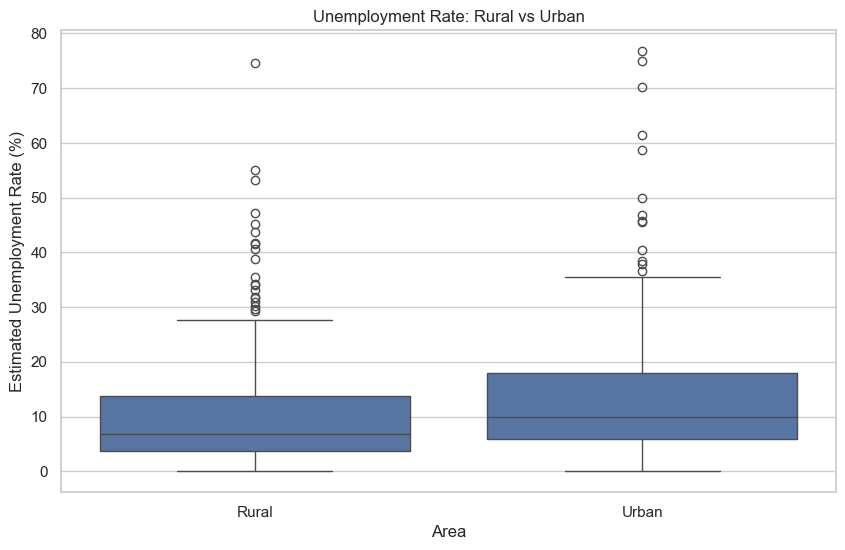

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Area', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate: Rural vs Urban")
plt.show()


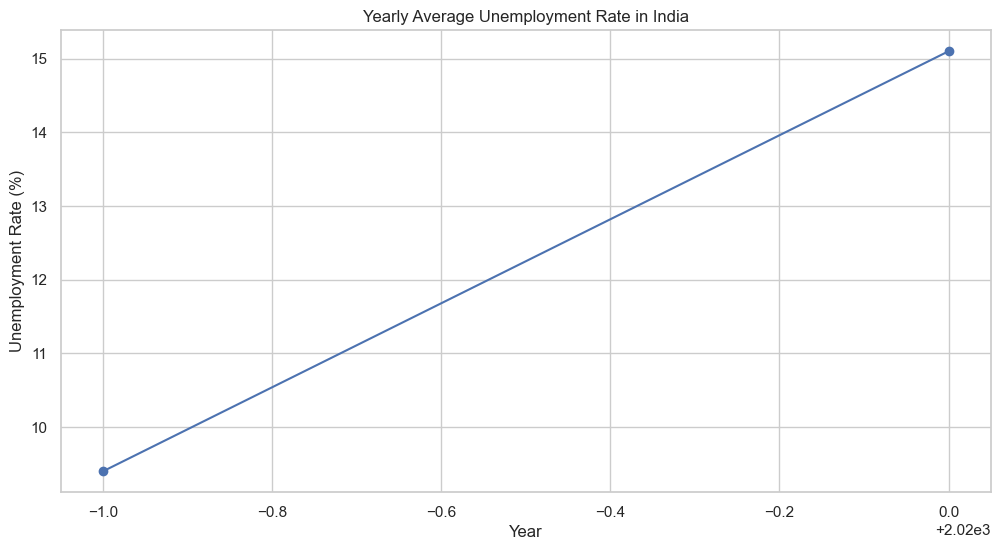

In [29]:
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title("Yearly Average Unemployment Rate in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [30]:
print("Highest Unemployment Rate:", df['Estimated Unemployment Rate (%)'].max())
print("Lowest Unemployment Rate:", df['Estimated Unemployment Rate (%)'].min())
print("Average Unemployment Rate:", df['Estimated Unemployment Rate (%)'].mean())


Highest Unemployment Rate: 76.74
Lowest Unemployment Rate: 0.0
Average Unemployment Rate: 11.787945945945946
